In [1]:
import glob
import os as os
import re as re
import pandas as pd
import matplotlib as mpl
import seaborn as sns

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

In [2]:
from motors.plot import *
from motors.aesthetics import *
prepare_plot()

# Load in pre-computed pandas `DataFrame`s

These pickle files contain flux, stall force, and maximum power for each torsion angle as a fuction of substrate concentration. The concentration is stored as an exponent (i.e., -6.0 means the substrate concentration is $10^{-6.0}$ M).

In [3]:
directory = './precomputed-pickles/'
adk_312 = pd.read_pickle(directory + 'adk-concentration-scan.pickle')
pka_140 = pd.read_pickle(directory + 'pka-concentration-scan.pickle')
hiv_10 = pd.read_pickle(directory + 'hiv-concentration-scan-catalytic-rate-10.pickle')
hiv_200 = pd.read_pickle(directory + 'hiv-concentration-scan-catalytic-rate-200.pickle')

In [4]:
adk_312.head(5)

,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
0,-6.0,-0.000533,0.037806,chi1ALA11,0.010940,0.0,0.0,11
1,-6.0,-0.000021,0.011227,chi1ALA127,0.005050,0.0,0.0,127
2,-6.0,-0.000119,0.025289,chi1ALA17,0.009720,0.0,0.0,17
3,-6.0,0.000078,0.016022,chi1ALA176,0.005808,0.0,0.0,176
4,-6.0,0.000033,0.006140,chi1ALA186,0.002077,0.0,0.0,186


Here I'm picking an example angle, I know is well-behaved.

In [5]:
concentrations = [10**i for i in np.unique(adk_312['Concentration'].values)]
directional_flux, reciprocating_flux, velocity = return_fluxes_and_velocity(protein='adk_md_data', 
                                                                            name='chi2THR175', 
                                                                            concentrations=concentrations,
                                                                            directory='./md-data/adenylate-kinase/')

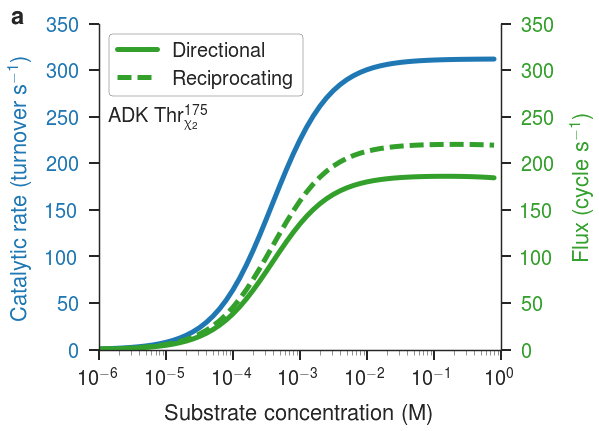

In [6]:
plot_fluxes_and_velocity(concentrations, directional_flux, reciprocating_flux, velocity,
                        ymin1=0, ymax1=350, label='ADK Thr$^{{175}}_{{\chi_2}}$')
panel_label('a', panel_xoffset=-0.22, panel_yoffset=1.0)

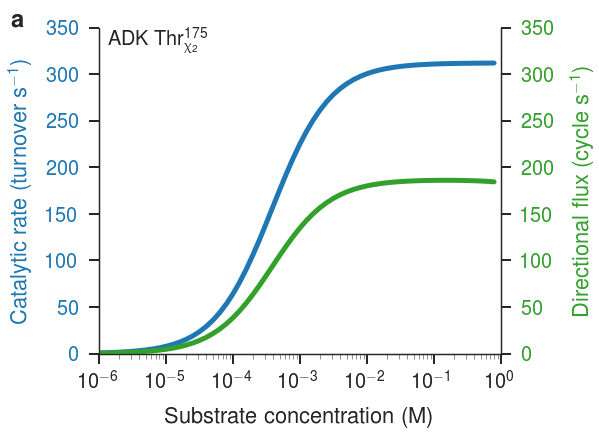

In [7]:
plot_directional_flux_and_velocity(concentrations, directional_flux, velocity,
                        ymin1=0, ymax1=350, label='ADK Thr$^{{175}}_{{\chi_2}}$')
panel_label('a', panel_xoffset=-0.22, panel_yoffset=1.0)

In [9]:
concentrations = [10**i for i in np.unique(pka_140['Concentration'].values)]
directional_flux, reciprocating_flux, velocity = return_fluxes_and_velocity(protein='pka_md_data', 
                                                                            name='psiSER311', 
                                                                            concentrations=concentrations,
                                                                            directory='./md-data/pka-md-data/')

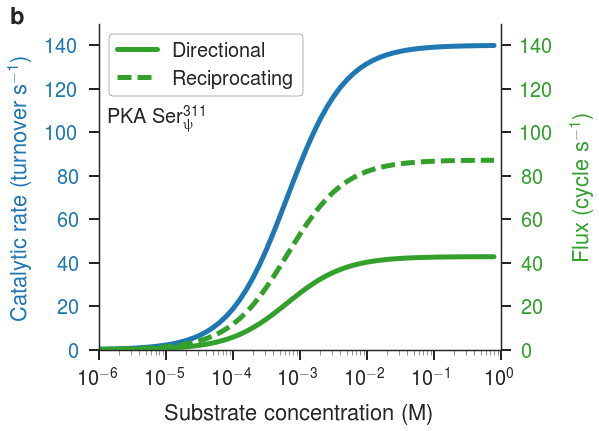

In [10]:
plot_fluxes_and_velocity(concentrations, directional_flux, reciprocating_flux, velocity,
                        ymin1=0, ymax1=150, label='PKA Ser$^{{311}}_{{\psi}}$')
panel_label('b', panel_xoffset=-0.22, panel_yoffset=1.0)

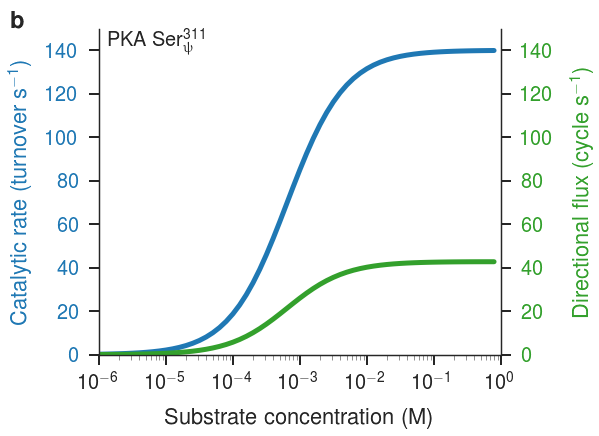

In [11]:
plot_directional_flux_and_velocity(concentrations, directional_flux, velocity,
                        ymin1=0, ymax1=150, label='PKA Ser$^{{311}}_{{\psi}}$')
panel_label('b', panel_xoffset=-0.22, panel_yoffset=1.0)

In [12]:
concentrations = [10**i for i in np.unique(pka_140['Concentration'].values)]
directional_flux, reciprocating_flux, velocity = return_fluxes_and_velocity(protein='pka_md_data', 
                                                                            name='chi2GLU194', 
                                                                            concentrations=concentrations,
                                                                            directory='./md-data/pka-md-data/')

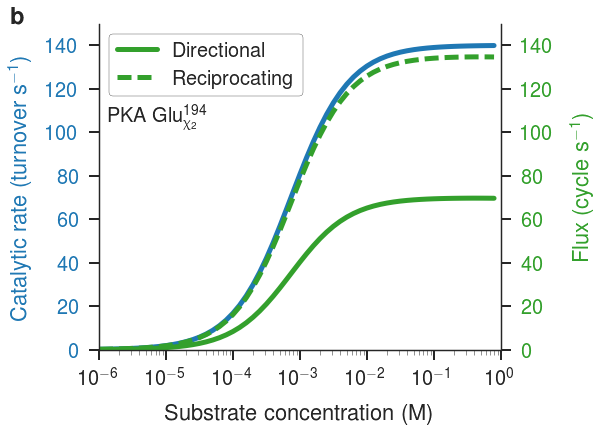

In [13]:
plot_fluxes_and_velocity(concentrations, directional_flux, reciprocating_flux, velocity,
                        ymin1=0, ymax1=150, label='PKA Glu$^{{194}}_{{\chi_2}}$')
panel_label('b', panel_xoffset=-0.22, panel_yoffset=1.0)

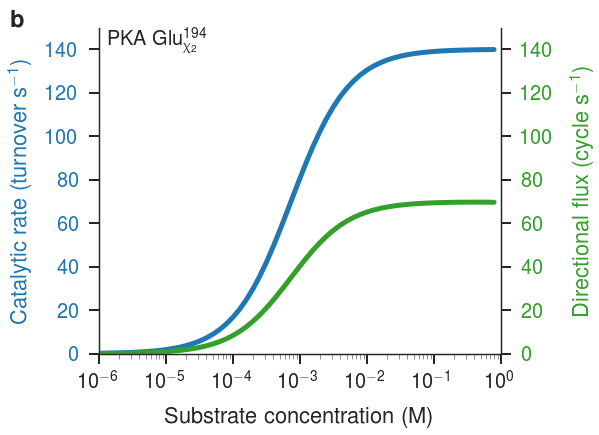

In [14]:
plot_directional_flux_and_velocity(concentrations, directional_flux, velocity,
                        ymin1=0, ymax1=150, label='PKA Glu$^{{194}}_{{\chi_2}}$')
panel_label('b', panel_xoffset=-0.22, panel_yoffset=1.0)

In [18]:
concentrations = [10**i for i in np.unique(hiv_10['Concentration'].values)]
directional_flux, reciprocating_flux, velocity = return_fluxes_and_velocity(protein='hiv_md_data', 
                                                                            name='chi2ASP124', 
                                                                            concentrations=concentrations,
                                                                            directory='./md-data/hiv-protease/')

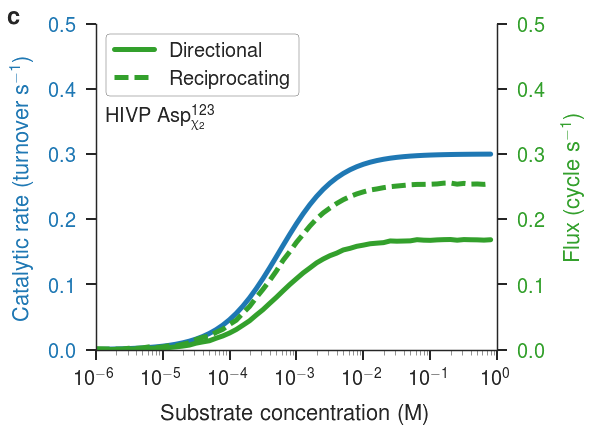

In [19]:
plot_fluxes_and_velocity(concentrations, directional_flux, reciprocating_flux, velocity,
                        ymin1=0, ymax1=0.5, label='HIVP Asp$^{{123}}_{{\chi_2}}$')
panel_label('c', panel_xoffset=-0.22, panel_yoffset=1.0)

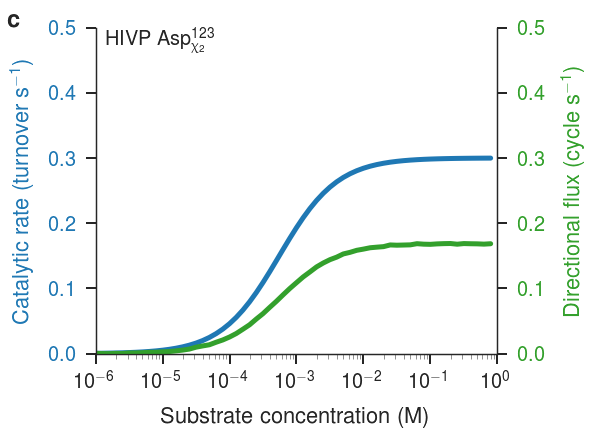

In [20]:
plot_directional_flux_and_velocity(concentrations, directional_flux, velocity,
                        ymin1=0, ymax1=0.5, label='HIVP Asp$^{{123}}_{{\chi_2}}$')
panel_label('c', panel_xoffset=-0.22, panel_yoffset=1.0)